## Building CNN to classify face with mask and face with no Mask 

In [2]:
import os 
import tensorflow as tf
import cv2
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [3]:
base_dir  = os.path.join(os.getcwd(),'dataset/')
cate = os.listdir(base_dir)
cate

['with_mask', 'without_mask']

### import the Image Dataset

#### Catagories
0 - with mask
1 - without mask


In [4]:
image_size =100
data_array = []
for i in cate:
    path_ = os.path.join(base_dir , i)
    label = cate.index(i)
    for img_name in os.listdir(path_):
        img_path = os.path.join(path_ , img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img , (image_size , image_size))
        data_array.append([img , label])


### Shuffling , splitting and Normalising  the image data

In [5]:
np.random.shuffle(data_array)

In [6]:
x=[]
y=[]
for x_val , y_val in data_array:
    x.append(x_val)
    y.append(y_val)
x=np.array(x)
y=np.array(y)
y_ = np.array(y)

y=to_categorical(y)

In [7]:
x.shape

(7553, 100, 100, 3)

In [8]:
x = x/255.0

In [9]:
from sklearn.model_selection import train_test_split
train_x , test_x , train_y , test_y =train_test_split(x, y , test_size=0.2)


### Building Model

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout , Flatten , Conv2D , MaxPool2D


In [11]:
model = Sequential()
model.add(Conv2D(filters=100 , kernel_size=(3,3) , activation='relu' , padding='same' ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=200, kernel_size=(3,3) , activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=300, kernel_size=(3,3) , activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())


model.add(Dense(64 , activation='relu'))

model.add(Dropout(0.4))
model.add(Dense(2 , activation='softmax'))

In [12]:
model.compile(optimizer='adam' , loss=['categorical_crossentropy'] , metrics=['accuracy'])

In [13]:
history= model.fit(train_x , train_y , epochs=10 , validation_split=0.2 )

Epoch 1/10
152/152 [==============================] - 461s 3s/step - loss: 0.5305 - accuracy: 0.7352 - val_loss: 0.2652 - val_accuracy: 0.8842
Epoch 2/10
152/152 [==============================] - 488s 3s/step - loss: 0.2798 - accuracy: 0.8851 - val_loss: 0.2480 - val_accuracy: 0.8958
Epoch 3/10
152/152 [==============================] - 482s 3s/step - loss: 0.2293 - accuracy: 0.9055 - val_loss: 0.1634 - val_accuracy: 0.9297
Epoch 4/10
152/152 [==============================] - 485s 3s/step - loss: 0.1815 - accuracy: 0.9238 - val_loss: 0.1687 - val_accuracy: 0.9371
Epoch 5/10
152/152 [==============================] - 309s 2s/step - loss: 0.1584 - accuracy: 0.9468 - val_loss: 0.1612 - val_accuracy: 0.9355
Epoch 6/10
152/152 [==============================] - 291s 2s/step - loss: 0.1306 - accuracy: 0.9510 - val_loss: 0.1569 - val_accuracy: 0.9404
Epoch 7/10
152/152 [==============================] - 288s 2s/step - loss: 0.1237 - accuracy: 0.9557 - val_loss: 0.1258 - val_accuracy: 0.9537

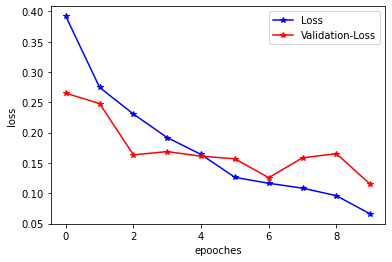

In [56]:
df = pd.DataFrame(history.history)
plt.plot(df.loss, color = "b" , marker ="*" , label = "Loss")
plt.plot(df.val_loss , color = "r" , marker ="*"  , label ="Validation-Loss")
plt.xlabel("epooches")
plt.ylabel('loss')
plt.legend()

In [35]:

pred = model.predict(test_x)


In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
model.evaluate(test_x , test_y)

48/48 [==============================] - 29s 594ms/step - loss: 0.1599 - accuracy: 0.9517


[0.15988516807556152, 0.9516876339912415]

In [41]:
confusion_matrix(np.argmax(pred,axis=1) , np.argmax(test_y , axis=1))

array([[708,  46],
       [ 27, 730]], dtype=int64)

In [38]:
test_y_ = np.argmax(test_y , axis=1)[0]
 

### Using Transfer Learing

In [60]:
pretrained_model = tf.keras.applications.DenseNet121(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model.trainable = False


inputs_densenet  = pretrained_model.input
fc_l  = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
op_l = tf.keras.layers.Dense(2, activation='softmax')(fc_l)
model = tf.keras.Model(inputs=inputs_densenet , outputs=op_l)
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [61]:
his=model.fit(train_x, train_y, validation_split=0.2,  steps_per_epoch=100, epochs=10)

Epoch 1/10
100/100 [==============================] - 192s 2s/step - loss: 0.2804 - accuracy: 0.9035 - val_loss: 0.0982 - val_accuracy: 0.9595
Epoch 2/10
100/100 [==============================] - 170s 2s/step - loss: 0.0599 - accuracy: 0.9817 - val_loss: 0.0787 - val_accuracy: 0.9636
Epoch 3/10
100/100 [==============================] - 718s 7s/step - loss: 0.0348 - accuracy: 0.9888 - val_loss: 0.0711 - val_accuracy: 0.9702
Epoch 4/10
100/100 [==============================] - 118s 1s/step - loss: 0.0269 - accuracy: 0.9906 - val_loss: 0.0852 - val_accuracy: 0.9677
Epoch 5/10
100/100 [==============================] - 157s 2s/step - loss: 0.0216 - accuracy: 0.9922 - val_loss: 0.0786 - val_accuracy: 0.9702
Epoch 6/10
100/100 [==============================] - 140s 1s/step - loss: 0.0076 - accuracy: 0.9990 - val_loss: 0.0721 - val_accuracy: 0.9752
Epoch 7/10
100/100 [==============================] - 143s 1s/step - loss: 0.0057 - accuracy: 0.9998 - val_loss: 0.0729 - val_accuracy: 0.9727

In [62]:
pred = model.predict(test_x)
print(model.evaluate(test_x , test_y))
print(confusion_matrix(np.argmax(pred,axis=1) , np.argmax(test_y , axis=1)))

48/48 [==============================] - 37s 773ms/step - loss: 0.0850 - accuracy: 0.9768
[0.08499634265899658, 0.9768365025520325]
[[717  17]
 [ 18 759]]


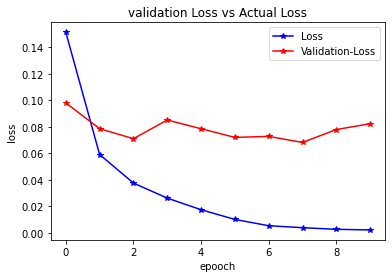

In [63]:
df = pd.DataFrame(his.history)
plt.plot(df.loss, color = "b" , marker ="*" , label = "Loss")
plt.plot(df.val_loss , color = "r" , marker ="*"  , label ="Validation-Loss")
plt.title("validation Loss vs Actual Loss")
plt.xlabel("epooch")
plt.ylabel("loss")
plt.legend()

### Final Model with Transfer learning - 2 epooches so that we could prevent over fitting


In [51]:
pretrained_model = tf.keras.applications.DenseNet121(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model.trainable = False


inputs_densenet  = pretrained_model.input
fc_l  = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
op_l = tf.keras.layers.Dense(2, activation='softmax')(fc_l)
model = tf.keras.Model(inputs=inputs_densenet , outputs=op_l)
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
his=model.fit(x, y,  steps_per_epoch=100, epochs=3)

Epoch 1/3
100/100 [==============================] - 190s 2s/step - loss: 0.2597 - accuracy: 0.9038
Epoch 2/3
100/100 [==============================] - 188s 2s/step - loss: 0.0493 - accuracy: 0.9812
Epoch 3/3
100/100 [==============================] - 194s 2s/step - loss: 0.0439 - accuracy: 0.9828


In [54]:
model.save("my_h5_model.h5")


### Saving the model for futher use 